# 【課題1】練習のために特徴量とカテゴリを選択
<br>
virgicolorとvirginicaのデータを抽出
<br>
sepal_lengthとpetal_lengthのデータを抽出

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris_data = load_iris()
X = iris_data.data
Y = iris_data.target
data_names = ['sepal_length','sepal_width','petal_length','petal_width']
target_names = ['setosa', 'versicolor', 'virginica']
#print(type(X))
# print(type(target_names))

df_X = pd.DataFrame(X,columns = data_names)
df_Y = pd.DataFrame(Y,columns = ['Species'])
# print(df_X)
# print(df_Y)

df_x = df_X.iloc[50:150,[0,2]] #virgicolorとvirginicaのデータを抽出
df_y = df_Y.iloc[50:150,:] #sepal_lengthとpetal_lengthのデータを抽出
print(df_x)
print(df_y)
df = pd.concat([df_x, df_y], axis=1,)
display(df)

     sepal_length  petal_length
50            7.0           4.7
51            6.4           4.5
52            6.9           4.9
53            5.5           4.0
54            6.5           4.6
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[100 rows x 2 columns]
     Species
50         1
51         1
52         1
53         1
54         1
..       ...
145        2
146        2
147        2
148        2
149        2

[100 rows x 1 columns]


,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


# 【問題2】データの分析
<br>
散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示

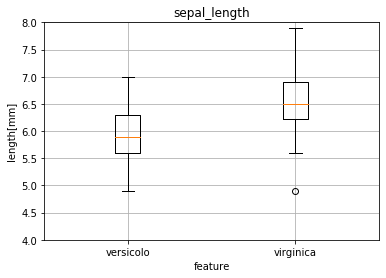

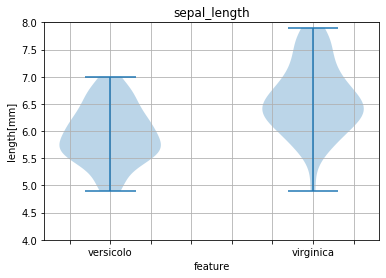

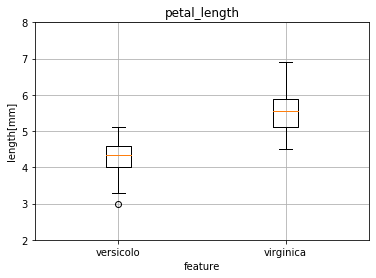

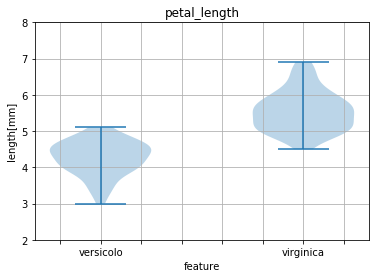

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_sepal_length = [df.sepal_length[df.Species == 1],\
                        df.sepal_length[df.Species == 2]]

feature_petal_length = [df.petal_length[df.Species == 1],\
                        df.petal_length[df.Species == 2]]

fig, ax = plt.subplots()

bp = ax.boxplot(feature_sepal_length)
ax.set_xticklabels(["versicolo", "virginica"])

plt.title('sepal_length')
plt.xlabel('feature')
plt.ylabel('length[mm]')
# Y軸のメモリのrange
plt.ylim([4,8])
plt.grid()
plt.show()

import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot()

ax.violinplot(feature_sepal_length)
ax.set_xticklabels(["","","versicolo","","","","","virginica"])
plt.title('sepal_length')
plt.xlabel('feature')
plt.ylabel('length[mm]')
plt.ylim([4,8])
plt.grid()
plt.show()

fig, ax = plt.subplots()

bp = ax.boxplot(feature_petal_length)
ax.set_xticklabels(["versicolo", "virginica"])

plt.title('petal_length')
plt.xlabel('feature')
plt.ylabel('length[mm]')
# Y軸のメモリのrange
plt.ylim([2,8])
plt.grid()
plt.show()

fig = plt.figure()
ax = fig.add_subplot()

ax.violinplot(feature_petal_length)
ax.set_xticklabels(["","","versicolo","","","","","virginica"])
plt.title('petal_length')
plt.xlabel('feature')
plt.ylabel('length[mm]')
plt.ylim([2,8])
plt.grid()
plt.show()


# 【問題3】前処理・訓練用データと検証用データの分割
<br>
訓練用データ75%、検証用データ25%として分割してください

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x.values,df_y.values)

X_train # 特徴量（説明変数）をX 訓練用とテスト用に３：１で分割
X_test
y_train # 正解（目的変数）をy 訓練用とテスト用に３：１で分割
y_test

array([[1],
       [1],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1]])

# 【問題4】前処理・標準化
<br>
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行う

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std =  scaler.transform(X_test)
# X_train_std_pd = pd.DataFrame(scaler.transform(X_train), columns=["versicolo", "virginica"])
# X_train_std_pd.describe()

,versicolo,virginica
count,7.500000e+01,7.500000e+01
mean,6.972201e-16,3.424483e-15
std,1.006734e+00,1.006734e+00
min,-2.123715e+00,-2.040363e+00
25%,-8.133791e-01,-6.877012e-01
50%,-8.541451e-02,-4.077590e-02
75%,5.697536e-01,7.237722e-01
max,2.244072e+00,2.194057e+00


# 【問題5】学習と推定

In [146]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
y_pred_train = knn.predict(X_train_std)
from sklearn import metrics
print("n=1の時" + str(metrics.accuracy_score(y_test, y_pred)))
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train)))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print("n=3の時" + str(metrics.accuracy_score(y_test, y_pred)))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print("n=5の時" + str(metrics.accuracy_score(y_test, y_pred)))

n=1の時0.88
学習結果0.9866666666666667
n=3の時0.88
n=5の時0.88


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


# 【問題6】評価

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))


0.88
0.9375
0.8823529411764706
0.9090909090909091


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15,  2],
       [ 1,  7]])

Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値の説明

In [ ]:
Accuracy（正解率）：すべてのサンプルに対し正解したサンプルの割合
Precision（適合率）：正解と判断したサンプルに対し正しく正解したサンプルの割合
Recall（再現率）：全ての正解に対し正しく正解したサンプルの割合
F値：適合率と再現率の調和平均、どのクラスを重要視するかによってベータを調整し評価する

# 【問題7】可視化

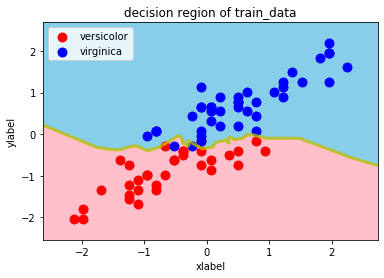

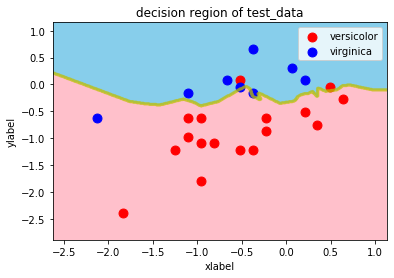

In [129]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import itertools

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),\
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i],\
                    label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i])
for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_train_std,list(itertools.chain.from_iterable(y_train)),knn,\
                title='decision region of train_data')
decision_region(X_test_std,list(itertools.chain.from_iterable(y_test)),knn,\
                title='decision region of test_data')

# 【問題8】他の手法の学習

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


学習結果0.9466666666666667
解析結果0.88


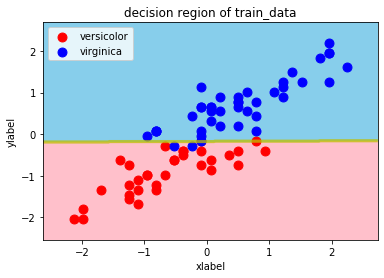

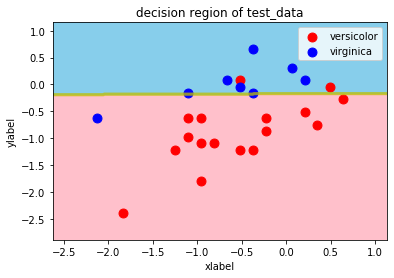

array([[15,  2],
       [ 1,  7]])

In [190]:
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_std, y_train)
y_pred = clf.predict(X_test_std)
y_pred_train = clf.predict(X_train_std)
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train)))
print("解析結果" + str(metrics.accuracy_score(y_test, y_pred)))
decision_region(X_train_std,list(itertools.chain.from_iterable(y_train)),clf,\
                title='decision region of train_data')
decision_region(X_test_std,list(itertools.chain.from_iterable(y_test)),clf,\
                title='decision region of test_data')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


学習結果0.9466666666666667
解析結果0.88


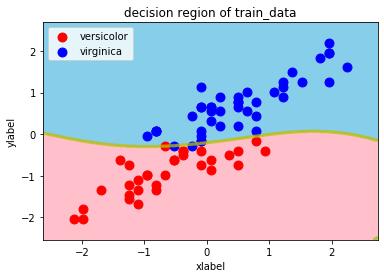

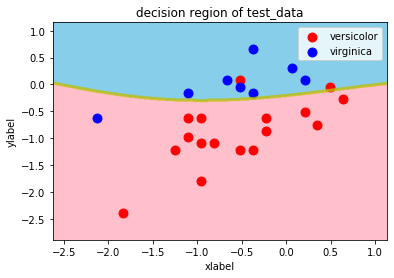

array([[15,  2],
       [ 1,  7]])

In [191]:
#SVM
from sklearn.svm import SVC
clf2 = SVC(gamma='auto')
clf2.fit(X_train_std, y_train)
y_pred = clf2.predict(X_test_std)
y_pred_train = clf2.predict(X_train_std)
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train)))
print("解析結果" + str(metrics.accuracy_score(y_test, y_pred)))
decision_region(X_train_std,list(itertools.chain.from_iterable(y_train)),clf2,\
                title='decision region of train_data')
decision_region(X_test_std,list(itertools.chain.from_iterable(y_test)),clf2,\
                title='decision region of test_data')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

学習結果0.9733333333333334
解析結果0.8


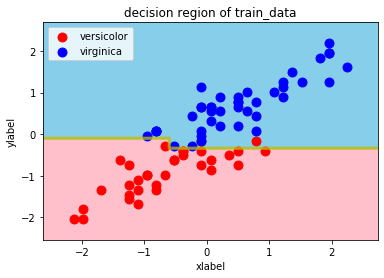

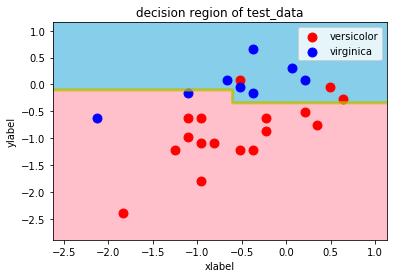

array([[14,  3],
       [ 2,  6]])

In [192]:
#決定木
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf3 = tree.DecisionTreeClassifier(max_depth=3)
clf3.fit(X_train_std, y_train)
y_pred_tree = clf3.predict(X_test_std)
y_pred_train_tree = clf3.predict(X_train_std)
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train_tree)))
print("解析結果" + str(metrics.accuracy_score(y_test, y_pred_tree)))
decision_region(X_train_std,list(itertools.chain.from_iterable(y_train)),clf3,\
                title='decision region of train_data')
decision_region(X_test_std,list(itertools.chain.from_iterable(y_test)),clf3,\
                title='decision region of test_data')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_tree)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


学習結果0.96
解析結果0.8


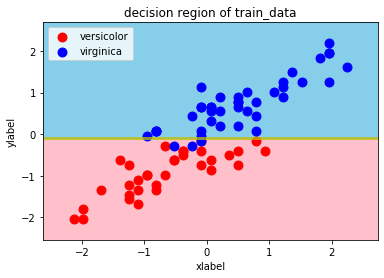

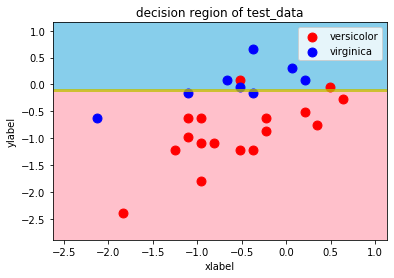

array([[15,  2],
       [ 3,  5]])

In [194]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf4 = RandomForestClassifier(max_depth=2, random_state=0)
clf4.fit(X_train_std, y_train)
y_pred_rabdom = clf4.predict(X_test_std)
y_pred_train_rabdom = clf4.predict(X_train_std)
print("学習結果" + str(metrics.accuracy_score(y_train, y_pred_train_rabdom)))
print("解析結果" + str(metrics.accuracy_score(y_test, y_pred_rabdom)))
decision_region(X_train_std,list(itertools.chain.from_iterable(y_train)),clf4,\
                title='decision region of train_data')
decision_region(X_test_std,list(itertools.chain.from_iterable(y_test)),clf4,\
                title='decision region of test_data')
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rabdom)